# Customer Churn Prediction Modeling
Goal: use machine learning to predict which customers will likely churn.
<br>Purpose: to reduce marketing expenditures and develop focused retention programs.
***

## Table of Contents 

1. [Introduction](#1.-Introduction)
2. [Dataset](#2.-Dataset)
<br>2.1 [Data Overview](#2.1-Data-Overview)
<br>2.2 [Feature Overview](#2.2-Feature-Overview)
3. [Data Cleaning](#3.-Data-Cleaning)
4. [Exploratory Data Analysis](#4.-Exploratory-Data-Analysis)
<br>4.1 [Visualizing Churn](#4.1-Visualizing-Churn)
<br>4.2 [Distribution of Numerical Features](#4.2-Distribution-of-Numerical-Features)
<br>4.3 [Scatterplot of Churn & Contract by MonthlyCharges and tenure](#4.3-Scatterplot-of-Churn-&-Contract-by-MonthlyCharges-and-tenure)
<br>4.4 [Cluster 1 Analysis](#4.4-Cluster-1-Analysis)
<br>4.5 [Cluster 2 Analysis](#4.5-Cluster-2-Analysis)
<br>4.6 [Cluster 3 Analysis](#4.6-Cluster-3-Analysis)
<br>4.7 [Churn Rate by Demographics](#4.7-Churn-Rate-by-Demographics)
<br>4.8 [Churn Rate by Services](#4.8-Churn-Rate-by-Services)
<br>4.9 [Churn Rate by Account Information](#4.9-Churn-Rate-by-Account-Information)
5. [Preprocessing](#5.-Preprocessing)
<br>5.1 [Creating Dummy Variables](#5.1-Creating-Dummy-Variables)
<br>5.2 [Heatmap of Correlation Coefficients](#5.2-Heatmap-of-Correlation-Coefficients)
6. [Model Building](#6.-Model-Building)
<br>6.1 [Intuition Behind Evaluation Metrics](#6.1-Intuition-Behind-Evaluation-Metrics)
<br>6.2 [Partition Data](#6.2-Partition-Data)
<br>6.3 [XGBoost Model](#6.3-XGBoost-Model)
<br>6.4 [LightGBM Model](#6.4-LightGBM-Model)
<br>6.5 [CatBoost Model](#6.5-CatBoost-Model)
<br>6.6 [SVM Model](#6.6-SVM-Model)
7. [Model Comparisions](#7.-Model-Comparisons)
<br>7.1 [Results](#7.1-Results)
<br>7.2 [ROC and PR Curves](#7.2-ROC-and-PR-Curves)
8. [Conclusion](#8.-Conclusion)

## 1. Introduction 

### 1.1 What is churn?

Customer churn refers to when a customer discontinues his or her commerce with a company. The churn rate measures the percentage of churned customers over a particular period - typically monthly, quarterly, or annually - depending on the company and industry. 

### 1.2 The Importance of Predicting Customer Churn

The ability to predict which customers are at high risk to churn presents a huge marketing opportunity to any company. [Marketers] can market towards these consumers with individualized offers based on their purchase history or profile to entice them to remain a customer. A retained customer is more likely to purchase new or existing products/services. 

### 1.3 Approach to Predicting Churn

1. Edit this 
2. churn prediction modeling - include the algorithms you're going to use to build the model here and include hyperlinks to them for easy navigation.

The churn detection task is an imbalanced classification problem: where we have two classes we need to identify - churn and no-churn - with one category representing the overwhelming majority of the data points. 

#### Problem

Acquiring a new customer can be five times more expensive than retaining an existing one. Such a staggering proportion emphasizes the importance of catering to an existing customer’s satisfaction and longevity to generate sales at a high ROI. In fact, increasing customer retention rates by as little as 5% can increase profits by 25 to 95%, according to a study done by Frederick Reichheld of Bain & Company. A key metric in evaluating customer retention is the customer churn rate.

In the telecommunications industry, the churn rate measures the percentage of service subscribers who discontinue their subscriptions over a particular period. Many providers in the industry offer similar services and generate the bulk of their revenue through subscription costs; therefore, the churn rate is a key metric to minimize to sustain subscription revenues.

The varying Internet, television, and telephone service providers available to the public make it easy and desirable for customers to try different services to see which works best for them. Some providers do not even require customers to lock into long-term contracts and give them the flexibility to change providers frequently. Service providers are able to provide more value to customers via short-term contracts by retaining their existing customers and minimizing their churn. 

## 2. Dataset

### 2.1 Data Overview

The dataset used in this project is available on Kaggle, [here](https://www.kaggle.com/blastchar/telco-customer-churn).

Each row represents a customer and each column contains customers' attributes. The dataset includes information about demographics, services, account information, and churn. The "Churn" column is our binary target variable and represents customers who left within the last month.

### 2.2 Feature Overview
(code below left aligns the markdown tables)

In [1]:
%%html
<style>
    table {
        display: inline-block
    }
</style>

**A. Demographics**

| feature_name  | data_type   | description                    | unique_values      |
| ------------- | ----------- | ------------------------------ | ------------------ |
| gender        | categorical | sex                            | "Male" , "Female"  |
| SeniorCitizen | categorical | is senior citizen              | "Yes", "No"        |
| Partner       | categorical | customer has a partner         | "Yes", "No"        |
| Dependents    | categorical | customer has dependents        | "Yes", "No"        |

**B. Services**

| feature_name      | data_type   | description                    | unique_values              |
| ----------------- | ----------- | ------------------------------ | -------------------------- |
| PhoneService      | categorical | has phone service              | "Yes", "No"                |
| MultipleLines     | categorical | has multiple phone lines       | "Yes", "No"                |
| InternetService   | categorical | type of Internet service       | "DSL", "Fiber optic", "No" |
| OnlineSecurity    | categorical | has malware protection         | "Yes", "No"                |
| OnlineBackup      | categorical | has digital backup service     | "Yes", "No"                |
| DeviceProtection  | categorical | has device protection plan     | "Yes", "No"                |
| TechSupport       | categorical | has tech support               | "Yes", "No"                |
| StreamingTV       | categorical | has TV streaming service       | "Yes", "No"                |
| StreamingMovies   | categorical | has movie streaming service    | "Yes", "No"                |

**C. Account Information**

| feature_name      | data_type           | description                            | unique_values                   |
| ----------------- | ------------------- | -------------------------------------- | ------------------------------- |
| customerID        | categorical         | customer identification number         |                                 |
| tenure            | numerical (ordinal) | # of months with company               |                                 |
| Contract          | categorical         | contractual term                       | "Monthly", "Annual", "Biannual" |
| PaperlessBilling  | categorical         | billed via email                       | "Yes", "No"                     |
| PaymentMethod     | categorical         | method of payment on file              | "Electronic Check", "Mailed Check", "Bank transfer (automatic)", "Credit card (automatic)"    |
| MonthlyCharges    | numerical (cardinal)| amount charged to the customer monthly |                         |
| TotalCharges      | numerical (cardinal)| total amount charged to the customer   |                         |

**D. Target Variable**

| feature_name      | data_type         | description                    | unique_values                   |
| ----------------- | ----------------- | ------------------------------ | ------------------------------- |
| Churn             | categorical       | left within the last month     | "Yes", "No"                     |

***

## 3. Data Cleaning

In [2]:
#Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline
sns.set()

#Load dataset
df = pd.read_csv('data/WA_Fn-UseC_-Telco-Customer-Churn.csv', index_col='customerID')

# Identify feature data types and data set shape. 
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 20 columns):
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), object(17)
memory usage: 1.1+ MB


The output above shows no missing values in the dataset; however, there may be missing values encoded with erroneous symbols. We'll take a closer look at potential missing values in a bit but first, we can see that the **TotalCharges** Series is categorically encoded as an "object" when it should be numerically encoded as "float64" data type. Let's take a closer look at the values in the column.

In [3]:
df.TotalCharges.values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

We can see that the numbers in the TotalCharges column are encoded as strings. Since the Series contains string values, it may contain null values that are encoded as strings, such as blank spaces or dashes. **After checking for these null values** and imputing or dropping them, we'll convert the Series to float64 data type.

In [4]:
# Identify number of missing (null) values in the data set.
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

At first glance, all features appear to have non-null entries; however, there may still be missing values encoded in different ways. Let's check if any entries in the dataframe contain blank spaces or random symbols that could be used to represent a missing entry.

In [5]:
# Replace any whitespace values with NaN
df = df.replace(r'\s+$', np.nan, regex=True)

# Replace any wild characters (symbols) with NaN
wild_chars = ['?', '-', '.', '_', '*']
for i in wild_chars:
    df[df == i] = np.nan

# Print number of null values 
print(df.isnull().sum())

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64


The TotalCharges column contains 11 missing/null values. The records containing null values comprise only 0.16% of the total samples. Since these problematic records account for a small proportion of the total samples, dropping them won't have a significant impact on our analysis. Let's go ahead and drop all records containing null values.

In [6]:
# Drop missing values
df = df.dropna()

# After dropping the missing values from the TotalCharges column, convert it from string to float. 
df.TotalCharges = df.TotalCharges.astype(float)

The missing values have been dropped from the dataset and the TotalCharges column is converted into a numerical feature. Let's display the unique values for each column to see if we can further consilidate the features and/or values.

In [7]:
# Display unique values for each feature.
for col in df:
    print(col)
    print(df[col].unique(), '\n')

gender
['Female' 'Male'] 

SeniorCitizen
[0 1] 

Partner
['Yes' 'No'] 

Dependents
['No' 'Yes'] 

tenure
[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39] 

PhoneService
['No' 'Yes'] 

MultipleLines
['No phone service' 'No' 'Yes'] 

InternetService
['DSL' 'Fiber optic' 'No'] 

OnlineSecurity
['No' 'Yes' 'No internet service'] 

OnlineBackup
['Yes' 'No' 'No internet service'] 

DeviceProtection
['No' 'Yes' 'No internet service'] 

TechSupport
['No' 'Yes' 'No internet service'] 

StreamingTV
['No' 'Yes' 'No internet service'] 

StreamingMovies
['No' 'Yes' 'No internet service'] 

Contract
['Month-to-month' 'One year' 'Two year'] 

PaperlessBilling
['Yes' 'No'] 

PaymentMethod
['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)'] 

MonthlyCharges
[29.85 56.95 53.85 ... 63.1  44.2  78.7

* Let's replace the 0's and 1's in the SeniorCitizen column with "No" and "Yes", respectively, to keep the binary feature values consistent for one-hot encoding and visualization labeling. We will encode all features numerically for model building during [preprocessing](#5.1-Creating-Dummy-Variables). 
* For the features relating to Services, we replace the "No internet service" value to "No" to eliminate redundancy: the InternetService feature let's us know whether or not the customer had Internet services. 
* We must also replace the "No phone service" value in the MultipleLines feature with "No" to eliminate redunancy: the PhoneService feature let's us know whether or not the customer had phone services.
* For the Contract feature, let's replace the following for simplicity:
    * "Month-to-month" with "Monthly"
    * "One year" with "Annual"
    * "Two year" with "Biannual"

In [8]:
# Replace 0 and 1 with "No" and "Yes" in SeniorCitizen feature
df.SeniorCitizen = df.SeniorCitizen.replace({1:'Yes', 0:'No'})

# Replace "No internet service" with "No"
internet_cols = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
for x in internet_cols:
    df[x] = df[x].replace({'No internet service' : 'No'})

# Replace "No phone service" with "No"
df.MultipleLines = df.MultipleLines.replace({'No phone service' : 'No'})

# Contract feature changes
df.Contract = df.Contract.replace({
    'Month-to-month' : 'Monthly',
    'One year' : "Annual",
    'Two year' : 'Biannual'
})

The feature value consolidations are complete. Let's view all the updates made to our dataset on the first 5 records.

In [9]:
# View all changes made up to this point on the first 5 records
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,Female,No,Yes,No,1,No,No,DSL,No,Yes,No,No,No,No,Monthly,Yes,Electronic check,29.85,29.85,No
5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,Annual,No,Mailed check,56.95,1889.50,No
3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Monthly,Yes,Mailed check,53.85,108.15,Yes
7795-CFOCW,Male,No,No,No,45,No,No,DSL,Yes,No,Yes,Yes,No,No,Annual,No,Bank transfer (automatic),42.30,1840.75,No
9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Monthly,Yes,Electronic check,70.70,151.65,Yes


The data is cleaned and ready for some [EDA](#4.-Exploratory-Data-Analysis) and [model buidling](#6.-Model-Building)!

***

## 4. Exploratory Data Analysis
### 4.1 Visualizing Churn

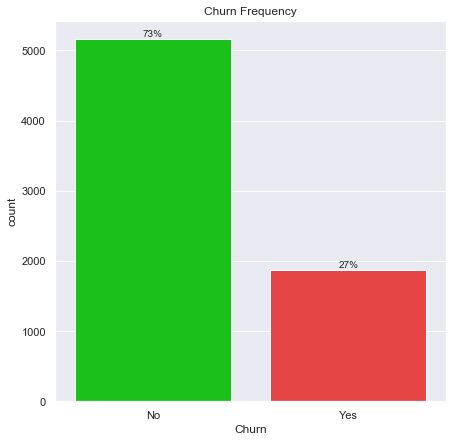

In [10]:
# Define colors
lightgreen = '#00db00'
red = '#ff2b2b'

# Instantiate figure to render plot on
plt.figure(figsize=(7, 7));

# Draw countplot of Churn frequency
ax_vc = sns.countplot(x='Churn', palette=[lightgreen, red], data=df);

# Display percentages above each bar so that the sum per value equals 100%
bars = ax_vc.patches
half = int(len(bars)/2)
left_bars = bars[:half]
right_bars = bars[half:]

for left, right in zip(left_bars, right_bars):
    height_l = left.get_height()
    height_r = right.get_height()
    total = height_l + height_r

    ax_vc.text(left.get_x() + left.get_width()/2., height_l + 40, '{0:.0%}'.format(height_l/total), ha="center")
    ax_vc.text(right.get_x() + right.get_width()/2., height_r + 40, '{0:.0%}'.format(height_r/total), ha="center")

# Display title
plt.title('Churn Frequency');

plt.show()

* The churn rate (target variable) in our samples is **imbalanced**. 
* During model building, we will rescale the weights of the classes and tune parameters that accomodate for the class imbalance to optimize performance.
* We will evaluate model performance using precision, recall, f1-score, AUC (area under ROC curve), AUCPR (area under precision-recall curve), and logloss - metrics that are less sensitive to the class imbalance.

Click [here](#6.-Model-Building) to skip EDA and jump straight to the model building!

### 4.2 Distribution of Numerical Features

In [11]:
# Summary statistics of numerical features
df.describe()

,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,2283.300441
std,24.545260,30.085974,2266.771362
min,1.000000,18.250000,18.800000
25%,9.000000,35.587500,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.862500,3794.737500
max,72.000000,118.750000,8684.800000


The table above shows summary statistics for the numerical features in our dataset.

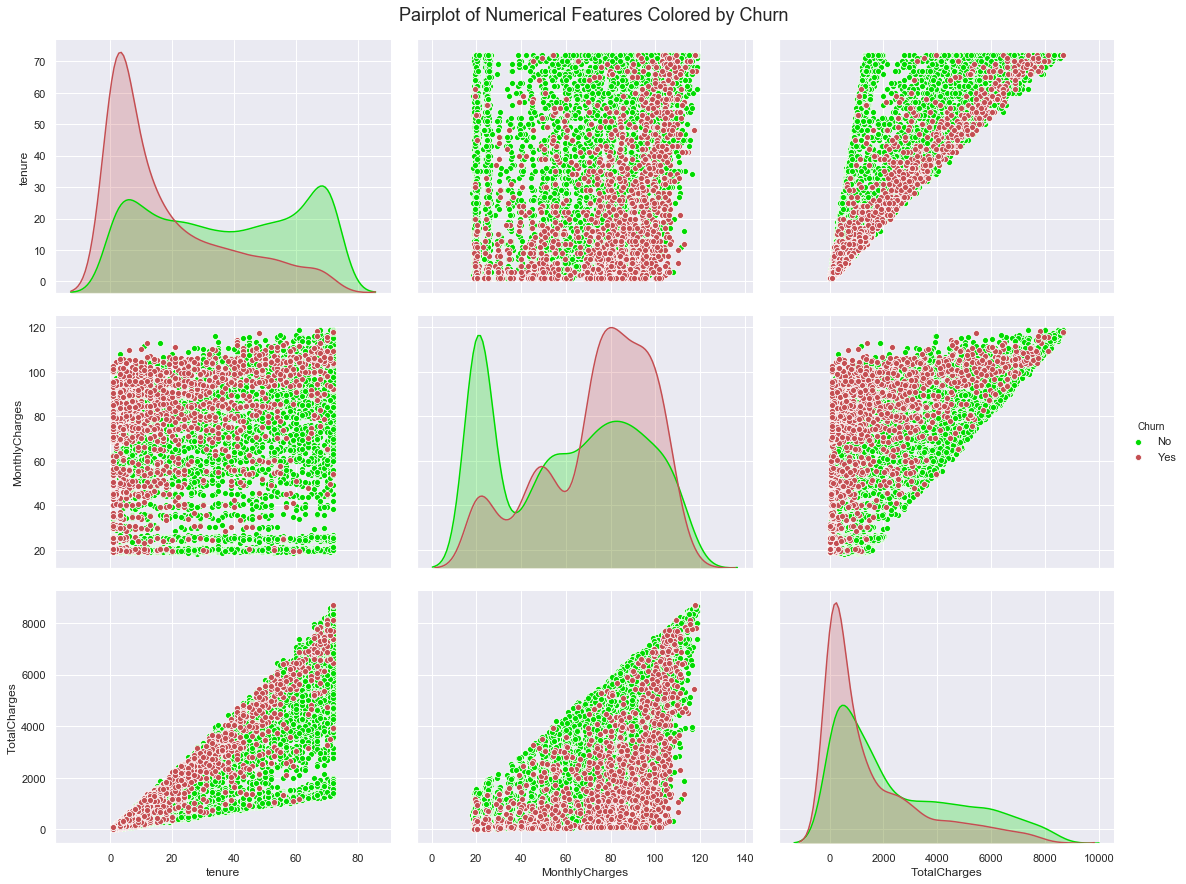

In [83]:
# Plot pairwise relationships between numerical features colored by Churn
g = sns.pairplot(df, hue='Churn', palette=[lightgreen, 'r'], height=4, aspect=1.3);

# Display parent title for figures
g.fig.suptitle('Pairplot of Numerical Features Colored by Churn', y=1.02, fontsize=18);

# Display plot
plt.show()

The diagonal univariate plots show kernel density estimates for our numerical data and summarize their distribution - which tell us customers with low tenure, high monthly charges, and/or high total charges churned the most.

The scatterplots convey the relationship between numerical features, most notably showing a positive, linear relationship between the following pairs of variables:
* TotalCharges and tenure
* TotalCharges and MonthlyCharges

A customer's total charges will compound overtime as he/she continues paying for services - in other words, the longer you're a customer, the more expenses you will incur. A customer's total charges are therefore **dependent** on tenure with the company. 

Similarly, a customer's total charges will increase with their monthly charges. The rate at which a customer's total charges increases is **dependent** on the monthly rate, as it is the product of monthly charges and tenure. The rate at which a customer's total charges compound can change depending on monthly rates but will inherently increase overtime. A customer's total charges are therefore **dependent** on his/her monthly charges.

In the subsequent sections, we'll explore our only pair of **independent** numerical variables, MonthlyCharges and tenure, against a few categorical variables.
***

### 4.3 Scatterplot of Churn & Contract by MonthlyCharges and tenure

As a quick recap, we only have 3 numeric features in the dataset: TotalCharges, MonthlyCharges, and tenure. 

A customer's total charges are **dependent** on monthly charges and tenure. As monthly charges increase, so will the total charges; similarly, as the customer's tenure with the company increases, so does the total charges incurred over the given period.

A customer's monthly charges, however, is **independent** of tenure since it doesn't effect the growth or change of the other. In the telecom industry, the churn rate is typically measured monthly since providers price their services on a monthly basis and experience faster churn rates. Monthly charges are therefore an essential feature to analyze when evaluating churn. Let's analyze clusters of churn between MonthlyCharges and tenure to uncover some hidden insights in our data.

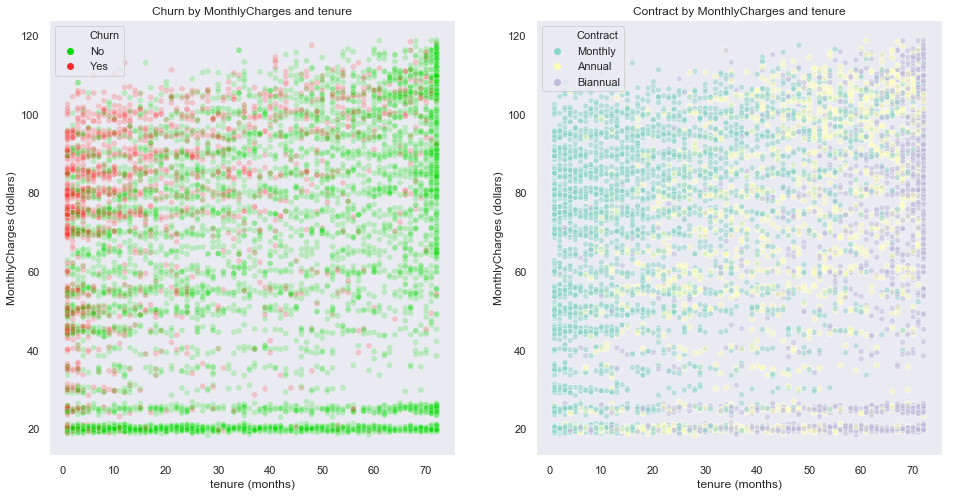

In [13]:
# Draw figure 
plt.figure(figsize=(16, 8));

# Scatterplot of Churn by MonthlyCharges and tenure 
plt.subplot(121);
sns.scatterplot(x='tenure', y='MonthlyCharges', hue='Churn', palette=[lightgreen, red], alpha=0.20, data=df);
plt.xlabel('tenure (months)');
plt.ylabel('MonthlyCharges (dollars)');
plt.title('Churn by MonthlyCharges and tenure');
plt.grid(False)

# Scatterplot of Contract by MonthlyCharges and tenure
plt.subplot(122);
sns.scatterplot(x='tenure', y='MonthlyCharges', hue='Contract', palette='Set3', alpha=0.50, data=df);
plt.xlabel('tenure (months)');
plt.ylabel('MonthlyCharges (dollars)');
plt.title('Contract by MonthlyCharges and tenure');
plt.grid(False)

# Display plot
plt.show()

The scatterplot to the left visualizes **churn** by monthly charges and tenure with transparency to accentuate clusters of records. The scatterplot to the right visualizes **contract types** by monthly charges and tenure. Churn and Contract are represented on two different plots to clearly identify clusters and trends for each variable.

The scatterplots above convey the following information:
* **Cluster 1:** Customers that pay less than 35/mo tend to not churn for up to 70 months and sign longer contracts as their tenure increases.
* **Cluster 2:** Customers that pay more than 70/mo with less than 10 months of tenure have monthly contracts and tend to churn.
* **Cluster 3:** Customers with more than 60 months of tenure tend to not churn and sign biannual contracts that incur the highest monthly charges.

In the subseqeuent sections, we'll take an in-depth look at these clusters and interpret what they mean in terms of consumer behavior.
***

### 4.4 Cluster 1 Analysis
Customers that pay less than 35/mo tend to not churn for up to 70 months and sign longer contracts as their tenure increases.

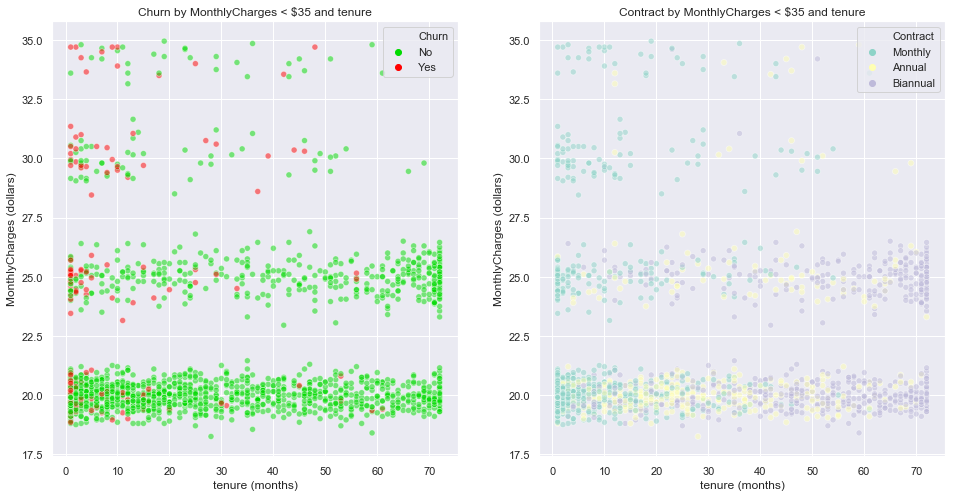


Churn rate for customers paying less than $35/month:
89.1% 	did NOT churn
10.9% 	churned


In [14]:
# ---------DIAGRAM 1--------- #
# Dataframe of MonthlyCharges less than $35
df_cluster1 = df[df.MonthlyCharges < 35]

# Draw figure to render subsequent plots
plt.figure(figsize=(16, 8));

# Scatterplot of records with MonthlyCharges less than $35
plt.subplot(121);
sns.scatterplot(x='tenure', y='MonthlyCharges', hue='Churn', palette=[lightgreen, 'red'], alpha=0.50, data=df_cluster1);
plt.xlabel('tenure (months)');
plt.ylabel('MonthlyCharges (dollars)');
plt.title('Churn by MonthlyCharges < $35 and tenure');

# ---------DIAGRAM 2--------- #
# Scatterplot of records with MonthlyCharges less than $35
plt.subplot(122);
sns.scatterplot(x='tenure', y='MonthlyCharges', hue='Contract', hue_order=['Monthly', 'Annual', 'Biannual'], 
                palette='Set3', alpha=0.50, data=df_cluster1);
plt.xlabel('tenure (months)');
plt.ylabel('MonthlyCharges (dollars)');
plt.title('Contract by MonthlyCharges < $35 and tenure');

# Display plot
plt.show()

# ---------STATISTICS--------- #
# Calculate churn rate for MonthlyCharges < $35
df_mo35 = df_cluster1.groupby('Churn').size()
no_mo35 = df_mo35[0]
yes_mo35 = df_mo35[1]
ret_mo35 = no_mo35 / (no_mo35 + yes_mo35)
churn_mo35 = yes_mo35 / (no_mo35 + yes_mo35)

print('\nChurn rate for customers paying less than $35/month:')
print('{0:.1%} \tdid NOT churn'.format(ret_mo35))
print('{0:.1%} \tchurned'.format(churn_mo35))

At **20/month**, the company retained customers for up to 70 months. Customers with lower tenure incurred these monthly charges more than those with higher tenure. This may suggest the company offered low rates to prospects and existing customers with low tenure to gain and maintain market share, repectively. 

An increasing amount of customers pay **25/month** as tenure increases. This trend suggests retained customers increasingly spend more per month as their tenure increases - this trend can also be seen in diagram [4.3](#4.3-Scatterplot-of-Churn-&-Contract-by-MonthlyCharges-and-tenure) above. Customer satisfaction increases with tenure, as does the willingness to incur higher monthly charges with additional subscriptions. The increasing amount of higher-spending, loyal customers can also be attributed to successful up-sell campaigns that influenced customer segments to purchase additional services. At 20/mo and 25/mo, the number of signed annual and biannual contracts increases with tenure. This trend can be also be attributed to increased satisfaction or successful up-sell campaigns. 
***

### 4.5 Cluster 2 Analysis
Customers that pay more than 70/mo with less than 10 months of tenure have monthly contracts and tend to churn.

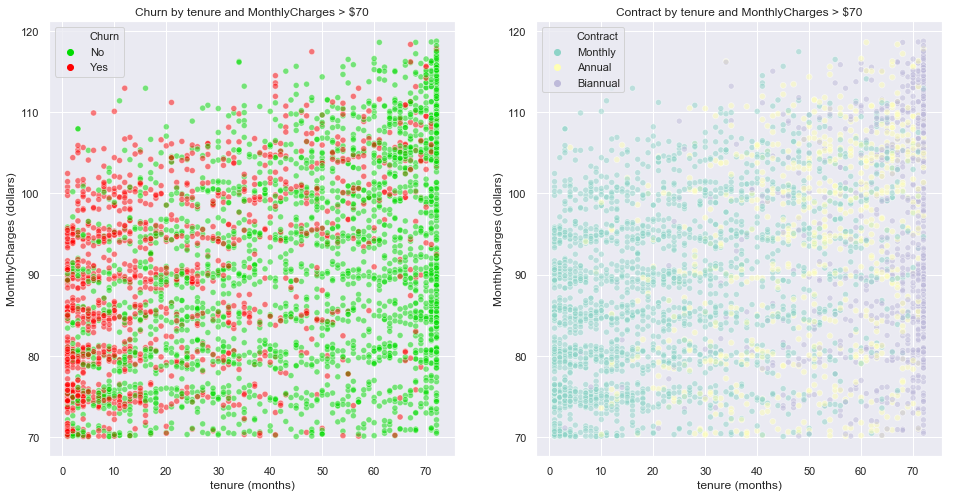


Churn rate for customers paying more than $70/month with less than 10 months of tenure:
69.7% 	churned
30.3% 	did NOT churn

Contract-type percentages for customers paying more than $70/month with less than 10 months that  CHURNED:
99.8% 	had a monthly contract
 0.2% 	had an annual contract
 0.0% 	had a biannual contract


In [15]:
# ---------DIAGRAM 1--------- #
# Dataframe of MonthlyCharges > $70
df_cluster2 = df[df.MonthlyCharges > 70]

# Draw figure to render subsequent plots
plt.figure(figsize=(16, 8));
plt.subplot(121);

# Scatterplot of Churn by tenure and MonthlyCharges greater than $70
sns.scatterplot(x='tenure', y='MonthlyCharges', hue='Churn', hue_order=['No', 'Yes'], 
                palette=[lightgreen, 'red'], alpha=0.50, data=df_cluster2);
plt.xlabel('tenure (months)');
plt.ylabel('MonthlyCharges (dollars)');
plt.title('Churn by tenure and MonthlyCharges > $70');

# ---------DIAGRAM 2--------- #
# Scatterplot of Contract by tenure and MonthlyCharges greater than $70
plt.subplot(122);
sns.scatterplot(x='tenure', y='MonthlyCharges', hue='Contract', palette='Set3', alpha=0.50, data=df_cluster2);
plt.xlabel('tenure (months)');
plt.ylabel('MonthlyCharges (dollars)');
plt.title('Contract by tenure and MonthlyCharges > $70');

# Display plot
plt.show()

# ---------STATISTICS--------- #
# Calculate churn rate for MonthlyCharges > $70 and tenure < 10
df_c2 = df[(df.MonthlyCharges > 70) & (df.tenure < 10)].groupby('Churn').size()
no_mo70 = df_c2[0]
yes_mo70 = df_c2[1]
ret_mo70 = no_mo70 / (no_mo70 + yes_mo70)
churn_mo70 = yes_mo70 / (no_mo70 + yes_mo70)

print('\nChurn rate for customers paying more than $70/month with less than 10 months of tenure:')
print('{0:.1%} \tchurned'.format(churn_mo70))
print('{0:.1%} \tdid NOT churn'.format(ret_mo70))

# Calculate Contract proportions for MonthlyCharges > $70 and tenure < 10
df_con2 = df[(df.MonthlyCharges > 70) & (df.tenure < 10)].groupby(['Contract', 'Churn']).size()

# Retained
monthly_no = df_con2[3]
annual_no = df_con2[0]
biannual_no = df_con2[2]

# Churned
monthly_yes = df_con2[4]
annual_yes = df_con2[1]

# Calculate churn rates
monthYesRate = monthly_yes / (monthly_yes + annual_yes)
annualYesRate = annual_yes / (monthly_yes + annual_yes)

print('\nContract-type percentages for customers paying more than $70/month with less than 10 months that  CHURNED:')
print('{0:.1%} \thad a monthly contract'.format(monthYesRate))
print(' {0:.1%} \thad an annual contract'.format(annualYesRate))
print(' 0.0% \thad a biannual contract')

The scatterplot to the left visualizes the **churn frequency** for customers paying 70 to 118 per month; the scatterplot to the right visualizes **contract types**  for the same customer segment.

70% of customers who paid more than 70/mo with less than 10 months of tenure discontinued their services (churned). This customer segment churned more than any other segment in the company. Almost all of the customers who churned in this segment had monthly contracts. The high monthly payments and flexibility to terminate services sooner incentivized this segment to churn and find better deals with different providers.
***

### 4.6 Cluster 3 Analysis
Customers with more than 60 months of tenure tend to not churn and sign biannual contracts that incur the highest monthly charges.

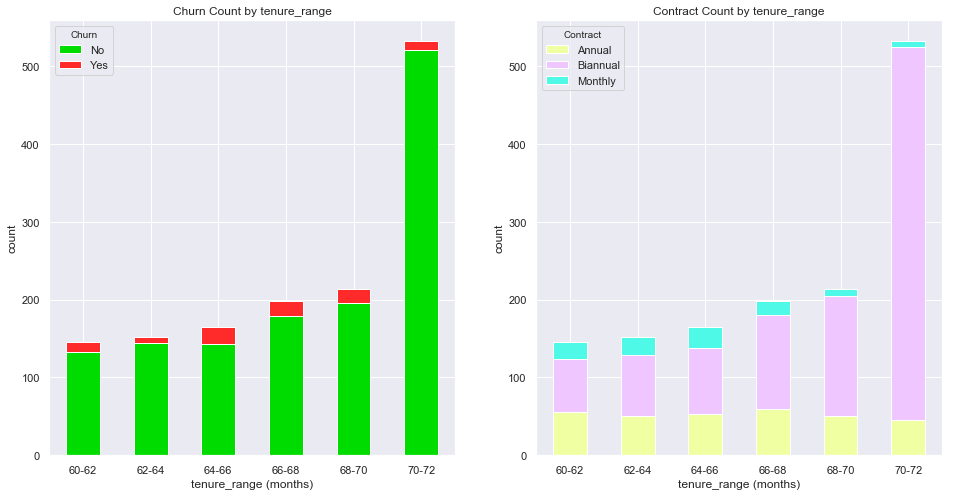

Statistics derived from stacked bar charts above:
Churn rate for customers with more than 60 months of tenure:
93.4% 	did NOT churn
 6.6% 	churned

Contract-type percentages for customers with more than 60 months of tenure:
70.1% 	had biannual contracts
22.2% 	had annual contracts
 7.7% 	had monthly contracts


In [16]:
# Make a dataframe copy to avoid chaining arguments 
import copy
dfCluster3 = copy.deepcopy(df)

# 1-D Series
tenure60 = dfCluster3.loc[dfCluster3.tenure > 60, 'tenure']

# Bin tenure into 2 month intervals
ten_bins = [60, 62, 64, 66, 68, 70, 72]
ten_labels = ['60-62', '62-64', '64-66', '66-68', '68-70', '70-72']
dfCluster3['tenure_range'] = pd.cut(tenure60, ten_bins, labels=ten_labels)

# Instantiate figure to display subplots
fig, axes = plt.subplots(nrows=1, ncols=2)

# ---------DIAGRAM 1--------- #
# Dataframe of tenure > 60
dfCluster3 = dfCluster3[dfCluster3.tenure > 60]

# Pivot table of Churn by tenure ranges 60 to 72
# (Doesn't matter which numerical feature used as values parameter: all 3 num. features return same results)
churn_pt = dfCluster3.pivot_table(index='tenure_range', columns='Churn', values='MonthlyCharges', aggfunc='count')

# Plot a stacked bar chart of Churn by tenure ranges
churn_stacked = churn_pt.plot(kind='bar', stacked=True, rot=0, color=[lightgreen, red], figsize=(16, 8), ax=axes[0]);
axes[0].set_xlabel('tenure_range (months)');
axes[0].set_ylabel('count');
axes[0].set_title('Churn Count by tenure_range');

# ---------DIAGRAM 2--------- #
# Pivot table of Contract by tenure ranges 60 to 72
# (Doesn't matter which numerical feature used as values parameter: all 3 num. features return same results)
contract_pt = dfCluster3.pivot_table(index='tenure_range', columns='Contract', values='MonthlyCharges', aggfunc='count')

# Plot a stacked bar chart of Contract by tenure ranges
contract_stacked = contract_pt.plot(kind='bar', stacked=True, rot=0, color=['#f1ffa3', '#efc6ff', '#4ff9e8'], ax=axes[1]);
axes[1].set_xlabel('tenure_range (months)');
axes[1].set_ylabel('count');
axes[1].set_title('Contract Count by tenure_range');

# Display plot
plt.show()

# ---------STATISTICS--------- #
# Calculate churn rate for tenure > 60
df_c3 = dfCluster3.groupby('Churn').size()
ret_c3 = df_c3[0]
churn_c3 = df_c3[1]

retRatec3 = ret_c3 / (ret_c3 + churn_c3)
churnRatec3 = churn_c3 / (ret_c3 + churn_c3)

print('Statistics derived from stacked bar charts above:')
print('Churn rate for customers with more than 60 months of tenure:')
print('{0:.1%} \tdid NOT churn'.format(retRatec3))
print(' {0:.1%} \tchurned'.format(churnRatec3))

# Calculate contract proportions for tenure > 60
df_con3 = dfCluster3.groupby('Contract').size()

monthly3 = df_con3[2]
annual3 = df_con3[0]
biannual3 = df_con3[1]

monthlyRate3 = monthly3 / (monthly3 + annual3 + biannual3)
annualRate3 = annual3 / (monthly3 + annual3 + biannual3)
biannualRate3 = biannual3 / (monthly3 + annual3 + biannual3)

print('\nContract-type percentages for customers with more than 60 months of tenure:')
print('{0:.1%} \thad biannual contracts'.format(biannualRate3))
print('{0:.1%} \thad annual contracts'.format(annualRate3))
print(' {0:.1%} \thad monthly contracts'.format(monthlyRate3))

The diagram to the left visualizes **churn proportions** in the top 16% of tenure in two month intervals. The diagram to the right visualizes the proportion of different **contract types** for the same percentile. 

93% of customers with more than 60 months of tenure continued using the company's services. This segment **churned the least** out of any other segment and are the company's most loyal customers given their high tenure and high retention rate. The number of churned customers with monthly contracts as tenure increases, while the number of biannual contracts increases with tenure, especially during 70 to 72 months.

### 4.7 Churn Rate by Demographics

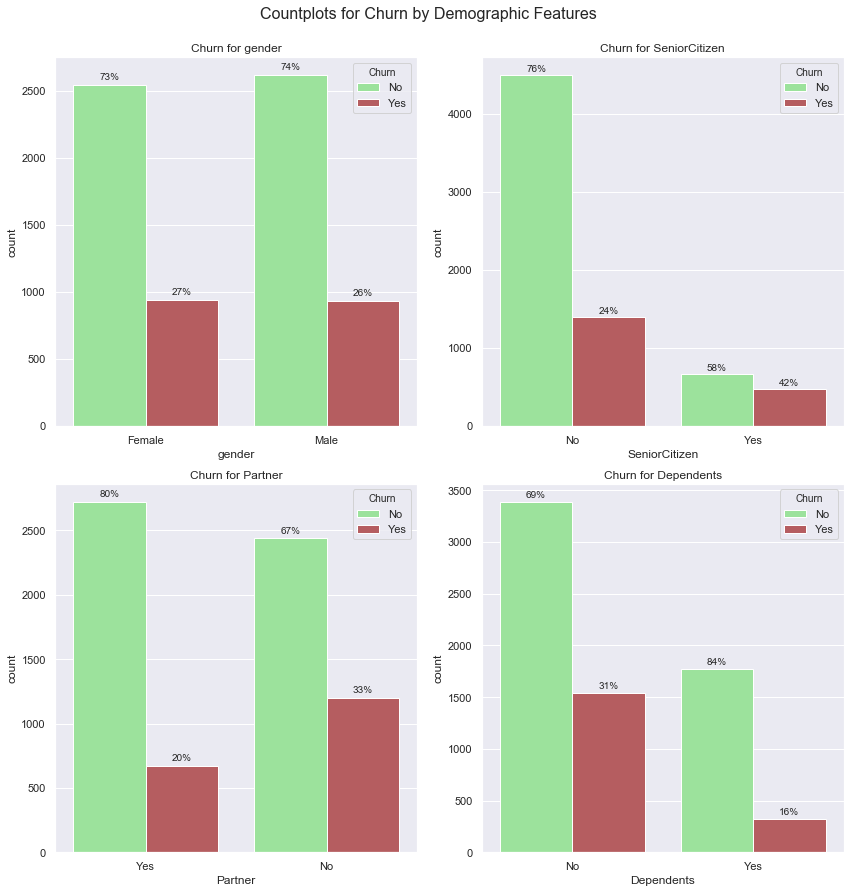

In [17]:
# Categorical demographic features
demo_cols = ['gender', 'SeniorCitizen', 'Partner', 'Dependents']

# Instantiate figure to render plots on
fig8 = plt.figure(figsize=(12, 12))

# Figure title
fig8.suptitle('Countplots for Churn by Demographic Features', y=1.03, fontsize=16);
    
# Loop through demographic features and draw plots
for col, i in zip(demo_cols, range(1, len(demo_cols) + 1)):
    plt.subplot(2, 2, i);
    ax = sns.countplot(x=col, hue='Churn', palette=['lightgreen', 'r'], data=df);

    # Display percentages above each bar so that the sum per value equals 100%
    bars = ax.patches
    half = int(len(bars)/2)
    left_bars = bars[:half]
    right_bars = bars[half:]

    for left, right in zip(left_bars, right_bars):
        height_l = left.get_height()
        height_r = right.get_height()
        total = height_l + height_r

        ax.text(left.get_x() + left.get_width()/2., height_l + 40, '{0:.0%}'.format(height_l/total), ha="center")
        ax.text(right.get_x() + right.get_width()/2., height_r + 40, '{0:.0%}'.format(height_r/total), ha="center")

    # Set title
    plt.title('Churn for ' + col);
    
# Display plot
plt.tight_layout()
plt.show()

**Notable observations for churn in demographic features:**

**Gender**
* Males and females have similar churn rates.
* There are almost the same amount of males and females in our samples.

**SeniorCitizen**
* The majority of customers in our samples are not senior citizens who did not churn.
* Senior citizen customers have almost double the churn rate of those who aren't senior citizens - partially attributed to their smaller sample size.
* Senior citizen customers account for the highest churn rate out of all demographic features.

**Partner**
* Customers without a partner had a slightly higher churn rate than those with a partner.
* The household income for customers without a partner was possibly lower than those with a partner, causing independent customers to be more sensitive to increases in monthly rates. Their sensitivity to pricing was likely a key factor for their higher churn rate.
* There were slightly more customers without a partner in our samples.

**Dependents**
* The churn rate for customers with dependents is very low - the lowest out of all demographic features.
* Customers with dependents may have paid for a family plan/bundle at a lower monthly rate for a longer contractual term which elicit higher retention rates - as shown in figures [4.3](#4.3-Scatterplot-of-Churn-&-Contract-by-MonthlyCharges-and-tenure) and [4.4](#4.4-Cluster-1-Analysis).
* The majority of customers in our samples did not have dependents.

***

### 4.8 Churn Rate by Services

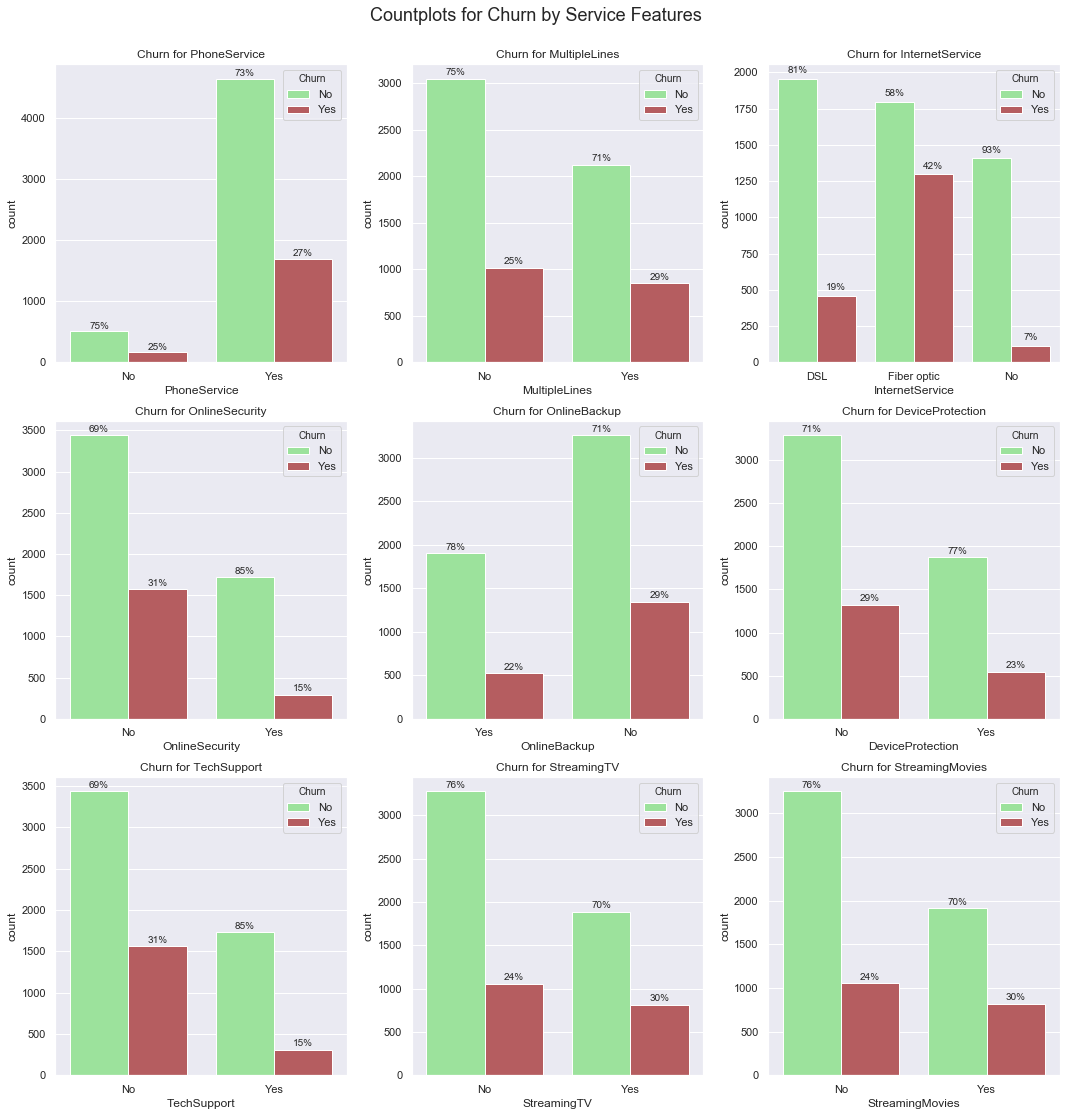

In [18]:
# Categorical service features 
serv_cols = [
    'PhoneService',
    'MultipleLines',
    'InternetService',
    'OnlineSecurity',
    'OnlineBackup',
    'DeviceProtection',
    'TechSupport',
    'StreamingTV',
    'StreamingMovies'
]

# Instantiate figure to render plots on
fig9 = plt.figure(figsize=(15, 15))

# Figure title
fig9.suptitle('Countplots for Churn by Service Features', y=1.03, fontsize=18);
    
# Loop through service features and draw plots
for col, i in zip(serv_cols, range(1, len(serv_cols) + 1)):
    plt.subplot(3, 3, i);
    ax = sns.countplot(x=col, hue='Churn', palette=['lightgreen', 'r'], data=df);
    
    # Display percentages above each bar so that the sum per value equals 100%
    bars = ax.patches
    half = int(len(bars)/2)
    left_bars = bars[:half]
    right_bars = bars[half:]

    for left, right in zip(left_bars, right_bars):
        height_l = left.get_height()
        height_r = right.get_height()
        total = height_l + height_r

        ax.text(left.get_x() + left.get_width()/2., height_l + 40, '{0:.0%}'.format(height_l/total), ha="center")
        ax.text(right.get_x() + right.get_width()/2., height_r + 40, '{0:.0%}'.format(height_r/total), ha="center")
    
    # Set title
    plt.title('Churn for ' + col);
    
# Display plot
plt.tight_layout()
plt.show()

**Notable observations for churn in service features:**

**PhoneService**
* Almost all customers pay for phone services and the majority of them did not churn.

**MultipleLines**
* Customers with and without multiple lines have similar churn rates.
* There was a similar amount of customers with and without multiple lines in our samples.

**InternetService**
* Customers without Internet service had the lowest churn rate out all service features whereas those with fiber optic had the highest churn rate out of all service features.
* Fiber optic costs more per month than DSL, and according to figures [4.4](#4.4-Scatterplot-of-Churn-&-Contract-by-MonthlyCharges-and-tenure) and [4.5](#4.5-Cluster-1-Analysis), higher monthly charges elicit higher churn rates.

**OnlineSecurity** 
* The churn rate for those without online security was double the rate of those with online security.
* More customers in our samples did not have online security (malware protection).

**OnlineBackup**
* The churn rate was similar for those with and without online backup; more customers did not have online backup.

**DeviceProtection**
* The churn rate was similar for those with and without device protection; more customers did not have device protection.

**TechSupport**
* The churn rate for those without tech support was double the rate of those with tech support.
* More customers in our samples did not have tech support.

**StreamingTV**
* The churn rate was similar for those with and without streaming TV; more customers did not have streaming TV.

**StreamingMovies**
* The churn rate was similar for those with and without streaming movies; more customers did not have streaming movies.

***

### 4.9 Churn Rate by Account Information

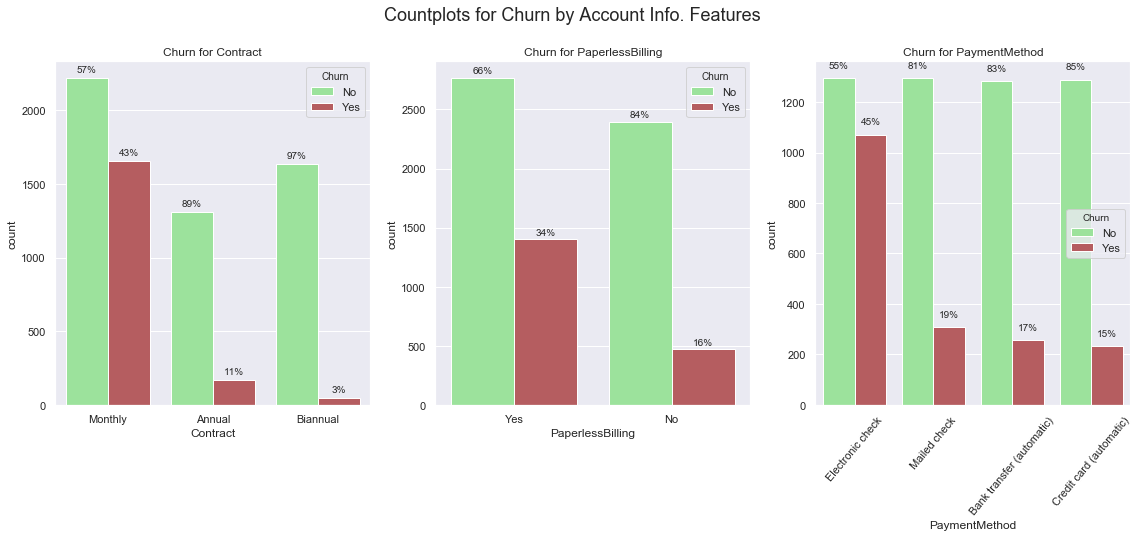

In [19]:
# Categorical account info features
acct_cols = [
    'Contract',
    'PaperlessBilling',
    'PaymentMethod'
]

# Instantiate figure to render plots on
fig10 = plt.figure(figsize=(16, 7))

# Figure title
fig10.suptitle('Countplots for Churn by Account Info. Features', y=1.06, fontsize=18);
    
# Loop through account info features and draw plots
for col, i in zip(acct_cols, range(1, len(acct_cols) + 1)):
    plt.subplot(1, 3, i);
    ax = sns.countplot(x=col, hue='Churn', palette=['lightgreen', 'r'], data=df);
    
    # Display percentages above each bar so that the sum per value equals 100%
    bars = ax.patches
    half = int(len(bars)/2)
    left_bars = bars[:half]
    right_bars = bars[half:]

    for left, right in zip(left_bars, right_bars):
        height_l = left.get_height()
        height_r = right.get_height()
        total = height_l + height_r

        ax.text(left.get_x() + left.get_width()/2., height_l + 40, '{0:.0%}'.format(height_l/total), ha="center")
        ax.text(right.get_x() + right.get_width()/2., height_r + 40, '{0:.0%}'.format(height_r/total), ha="center")
    
    if col == 'PaymentMethod':
        plt.xticks(rotation=50);
        plt.legend(['No', 'Yes'], loc='center right', title='Churn');
        
    # Set title
    plt.title('Churn for ' + col);
    
# Display plot
plt.tight_layout()
plt.show()

**Notable observations for churn in account information features:**

**Contract**
* The majority of customers in our samples had monthly contracts and churned significantly more than those with annual and biannual contracts.
* Customers with biannual contracts had the lowest churn rate and highest retention rate out of all account information features.
* Customers with annual contracts also had a significantly low churn rate and high retention rate.

**PaperlessBilling**
* The churn rate for those with paperless billing was double the rate of those without paperless billing.
* More customers in our samples opted in for paperless billing.

**PaymentMethod**
* The majority of customers in our samples made payments via electronic check and churned significantly more than those with a different payment method.
* Customers who paid via electronic check had the highest churn rate out of all account information features.
* Those who paid with any other payment method had similar churn rates.

***

## 5. Preprocessing
### 5.1 Creating Dummy Variables
Since scikit-learn does not accept categorical features to model with, we must encode the categorical features numerically. 

In [20]:
# Create dummy variables
df_cat_encoded = pd.get_dummies(df, drop_first=True)
df_cat_encoded.head()

,tenure,MonthlyCharges,TotalCharges,gender_Male,SeniorCitizen_Yes,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_Yes,InternetService_Fiber optic,...,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,Contract_Biannual,Contract_Monthly,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
customerID,,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,1,29.85,29.85,0,0,1,0,0,0,0,...,0,0,0,0,1,1,0,1,0,0
5575-GNVDE,34,56.95,1889.50,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
3668-QPYBK,2,53.85,108.15,1,0,0,0,1,0,0,...,0,0,0,0,1,1,0,0,1,1
7795-CFOCW,45,42.30,1840.75,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
9237-HQITU,2,70.70,151.65,0,0,0,0,1,0,1,...,0,0,0,0,1,1,0,1,0,1


The table above shows the first 5 records of our numerically encoded dataset.

### 5.2 Heatmap of Correlation Coefficients

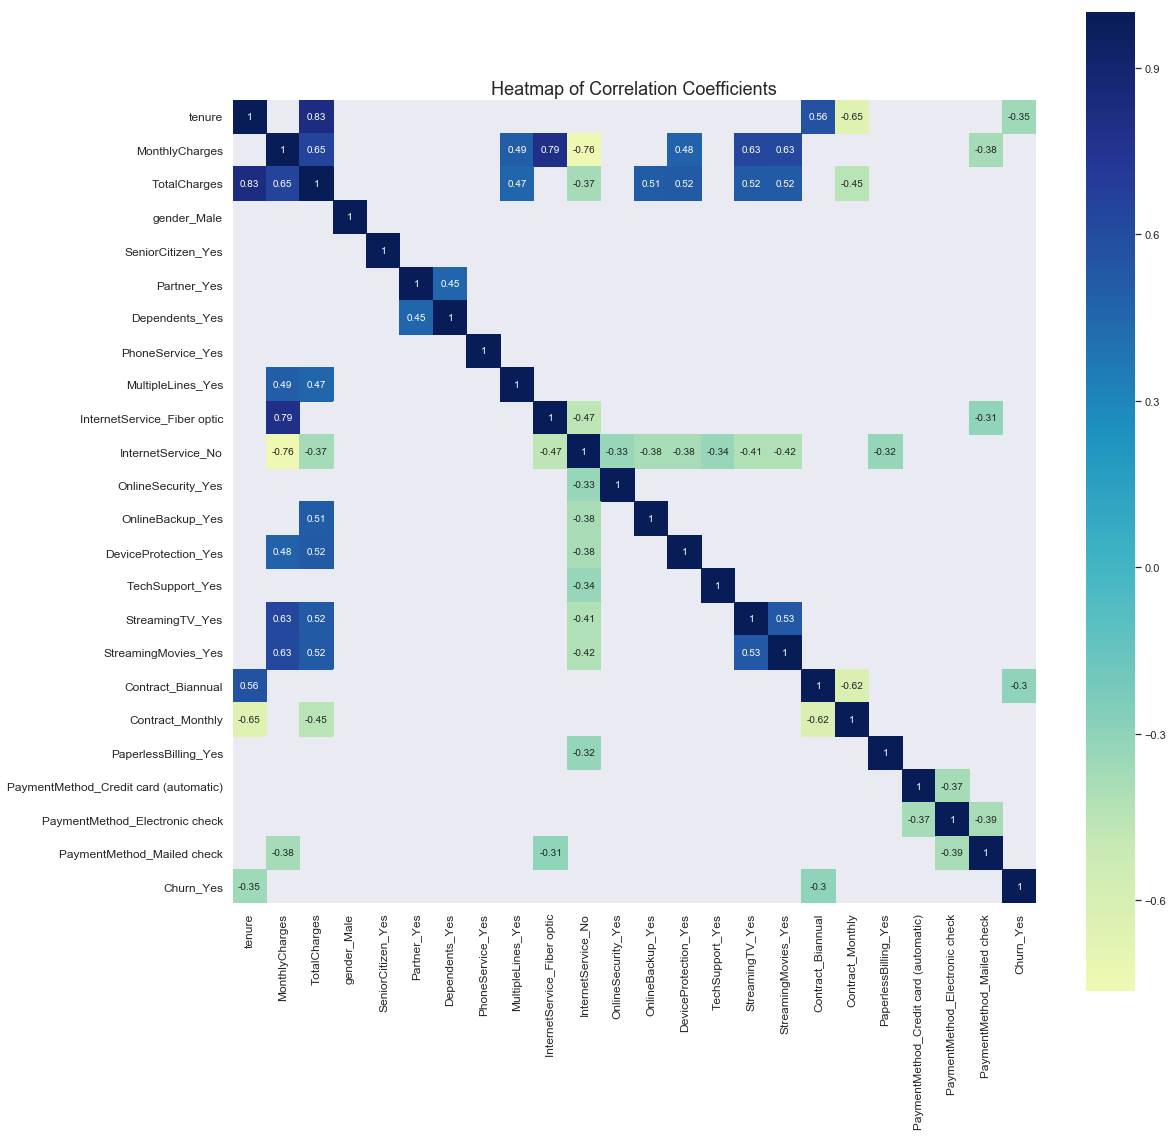

In [21]:
# Instantiate a mask for the weak correlations
weak_corr = ((0.45 > df_cat_encoded.corr()) & (df_cat_encoded.corr() > -0.30))

# Instantiate figure to render subsequent plot on
plt.figure(figsize=(18, 18))

# Draw heatmap
sns.heatmap(df_cat_encoded.corr(), 
            xticklabels=df_cat_encoded.corr().columns, 
            yticklabels=df_cat_encoded.corr().columns,
            center=0,
            cmap="YlGnBu",
            square=True,
            annot=True,
            mask=weak_corr);

# Set x and y tick (feature name) font sizes
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Heatmap of Correlation Coefficients', fontsize=18)

# Display plot
plt.show()

* The heatmap above computes the pairwise correlation between each feature in the dataset. 
* Only the values with strong correlation (upper 50th correlation percentile) are shown above: a coefficient between 0.45 to 0.90 is considered a strong, **positive** correlation and a coefficient between -0.30 to -0.60 is considered a strong, **negative** correlation. 
* TotalCharges and tenure are over 80% correlated with each other since TotalCharges is a dependent variable - a product of tenure and MonthlyCharges.
* Including this feature pair in some machine learning algorithms can create significant problems, while in others it will only introduce some minor redundancy and bias.
* We'll use all the features in our gradient boosting algorithms since their complexity can better accomodate for feature discrepencies.
* We'll exclude TotalCharges from the SVM model to reduce its dimensionality and optimize its speed and loss function.

Let's export the cleaned dataframes (both the original and numerically encoded) into CSV files to extensively tune in separate notebooks. Links to the tuning notebooks are provided in the model building section of this notebook. 

In [22]:
# Export cleaned, original dataframe to csv file
df.to_csv('data/cleaned_data/og_cleaned_samples.csv')

# Export cleaned, numerically encoded dataframe to csv file
df_cat_encoded.to_csv('data/cleaned_data/num_cleaned_samples.csv')

# * ***Consolidate section 6.1 for final notebook!***

## 6. Model Building
Section Outline:
1. Describe the intuition behind choosing evaluation metrics.
2. Partition the data into training and testing sets.
3. Build the following models:
    * [XGBoost](#6.3-XGBoost-Model)
    * [LightGBM](#6.4-LightGBM-Model)
    * [CatBoost](#6.5-CatBoost-Model)
    * [SVM](#6.6-SVM-Model)
4. Compare model evaluation metrics.     --- include ROC & PR curve plots and table comparing metrics and run times.
5. Choose the best model.          ---maybe choose the best model in the 'conclusion' section rather than the model building section


**The models shown in this notebook were tuned in separate notebooks. 
<br>Click the links below to view each model's tuning process.**
* [XGBoost tuning](https://github.com/ayn28/churn-prediction-modeling/blob/master/model-tuning/XGBoost-tuning.ipynb)
* [LightGBM tuning](https://github.com/ayn28/churn-prediction-modeling/blob/master/model-tuning/LightGBM-tuning.ipynb)
* [CatBoost tuning](https://github.com/ayn28/churn-prediction-modeling/blob/master/model-tuning/CatBoost-tuning.ipynb)
* [SVM tuning](https://github.com/ayn28/churn-prediction-modeling/blob/master/model-tuning/SVM-tuning.ipynb)
***

### 6.1 Intuition Behind Evaluation Metrics
Given our imbalanced classification problem where the positive class, "no-churn", greatly outnumbers the negative class, "churn", accuracy is not a good measure for assessing model performance because the model will biasedly predict more records as the majority class and convey a misleading evaluation.

Precision and recall are more appropriate metrics to use since they don't make use of the overwhelming, negative class ("no-churn") predictions and instead focus on identifying the positive "churn" cases. For our model evaluation, we will analyze precision, recall, f1-score, AUCPR (area under precision-recall curve), and AUC (area under ROC curve).

Given our particular business scenario, we will closely analyze the recall metric. Recall evaluates the ability of a model to find all the relevant cases within a dataset; it is the number of true positives divided by the sum of true positives and false negatives. In the scope of this project, true positives are correctly identified "churn" customers, and false negatives are individuals the model labels as "retained" who actually "churned".

A false negative is most problematic in our scenario because we misclassify a group of churned customers and miss an opportunity to market towards a niche group in a retention program that is, on average, a fraction of the cost of an acquisition program. By minimizing the number of false negatives, we can maximize our recall value and market towards the largest group of customers predicted to churn.

We will also take precision into consideration when evaluating performance, which is the model's ability to identify the relevant "churn" data points. A model with high recall and mid-to-low precision will account for a high percentage of correctly predicted "churn" customers and a low percentage of retained customers that were misclassified as "churned".

The main tradeoff here are the additional marketing dollars spent on retained customers that should ideally be spent on customers likely to churn - this, however, isn't entirely undesirable since the marketing dollars allocated towards "retained" customers will add to their longevity with the company.
***

### 6.2 Partition Data

In [23]:
from sklearn.model_selection import train_test_split

# Create features and target arrays
X = df_cat_encoded.drop(['Churn_Yes', 'gender_Male'], axis=1).values
y = df_cat_encoded.Churn_Yes.values

# Create training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

To create our features array, we drop the Churn feature since that is our target variable and we are trying to predict its labels. From our EDA, we determined that a customer's gender likely has no effect on their propensity to churn since it wasn't strongly correlated with other features and had no notable differences in churn rates between genders.
***

### 6.3 XGBoost Model
Click [here](https://github.com/ayn28/churn-prediction-modeling/blob/master/model-tuning/XGBoost-tuning.ipynb) to view the tuning process.

In [45]:
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import auc, roc_curve, precision_recall_curve, average_precision_score

# Define function to calculate evaluation metrics.
def xgb_metrics(clf_name, results_dict, ordered_dict):
    """Calculate and output evaluation metrics."""
    # Print best iteration
    print('Best iteration: {} rounds.'.format((clf_name.best_iteration)))
    # Store the AUCPR and AUC at the model's 
    # best iteration, using the AUC as the early
    # stopping metric.
    eval_mtrs = [{'logloss': i['logloss'][clf_name.best_iteration], 'aucpr': i['aucpr'][clf_name.best_iteration], 'auc': i['auc'][clf_name.best_iteration]} for i in results_dict.values()]
    logloss_mtr = eval_mtrs[0]['logloss']
    aucpr_mtr = eval_mtrs[0]['aucpr']
    auc_mtr = eval_mtrs[0]['auc']
    print('AUC:       {:.3f}'.format(auc_mtr))
    print('AUCPR:     {:.3f}'.format(aucpr_mtr))
    print('Logloss:   {:.3f}'.format(logloss_mtr))
    # Calculate precision, recall, and f1
    binary_preds = clf_name.predict(X_test)
    precision_mtr = precision_score(y_test, binary_preds)
    recall_mtr = recall_score(y_test, binary_preds)
    f1_mtr = f1_score(y_test, binary_preds)
    print('Precision: {0:.3f}'.format(precision_mtr))
    print('Recall:    {0:.3f}'.format(recall_mtr))
    print('F1-score:  {0:.3f}'.format(f1_mtr))
    # Append metrics to an ordered dictionary (for plotting)
    ordered_dict['AUC'] = round(auc_mtr, 3)
    ordered_dict['AUCPR'] = round(aucpr_mtr, 3)
    ordered_dict['Logloss'] = round(logloss_mtr, 3)
    ordered_dict['Precision'] = round(precision_mtr, 3)
    ordered_dict['Recall'] = round(recall_mtr, 3)
    ordered_dict['F1_score'] = round(f1_mtr, 3)
    
# Define function to plot ROC and PR curve.
def plot_roc_pr(clf_name):
    """Plot the ROC and PR-curve for a given classifier."""
    plt.figure(figsize=(14, 7))
    # Plot ROC
    plt.subplot(121)
    probs = clf_name.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, probs)
    roc_auc = auc(fpr, tpr)
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label='AUC = %0.3f' % roc_auc)
    plt.legend(loc='lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    # Plot PR curve
    plt.subplot(122)
    precision, recall, thresholds = precision_recall_curve(y_test, probs)
    average_precision = average_precision_score(y_test, probs)
    plt.title('Precision-Recall Curve')
    plt.plot(recall, precision, 'b', label='AUCPR = %0.3f' % average_precision)
    plt.legend(loc='lower right')
    plt.plot([0, 1], [0.5, 0.5], 'r--')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.show()

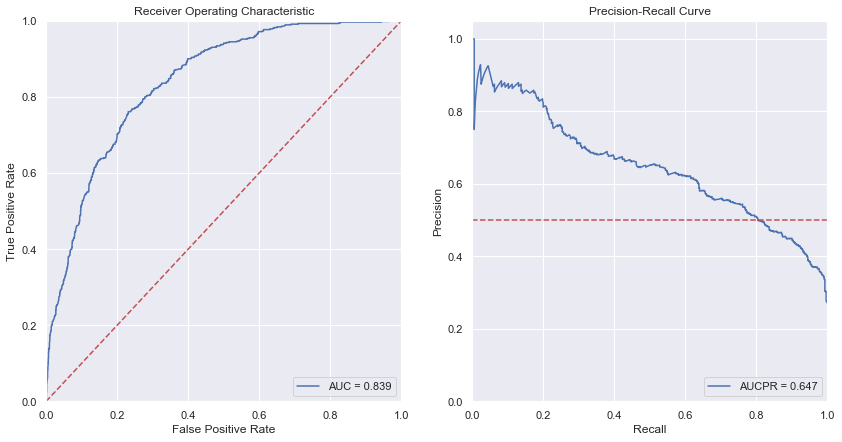

Best iteration: 16 rounds.
AUC:       0.839
AUCPR:     0.647
Logloss:   0.496
Precision: 0.498
Recall:    0.813
F1-score:  0.617


In [47]:
from xgboost import XGBClassifier
from collections import OrderedDict

# Final parameters
params_xgb = {
    'max_depth':        3,
    'min_child_weight': 13,
    'gamma':            5,
    'subsample':        1,        
    'colsample_bytree': 1,        
    'learning_rate':    0.3,      
    'n_estimators':     500,
    'scale_pos_weight': 2.76,        
    'verbosity':        0,
    'objective':        'binary:logistic',
    'eval_metric':      ['logloss', 'aucpr', 'auc'],     
    'seed':             42
}

# Instantiate classifier
clf_xgb = XGBClassifier(**params_xgb)

# Fit classifier
clf_xgb.fit(
    X_train,
    y_train,
    eval_set=[(X_test, y_test)],
    eval_metric=['logloss', 'aucpr', 'auc'],          
    early_stopping_rounds=10,
    verbose=False
)

# Store evaluation metrics in a dictionary
xgb_results = clf_xgb.evals_result()

# Output and plot evaluation metrics
xgb_evals_dict = OrderedDict()
plot_roc_pr(clf_xgb)
xgb_metrics(clf_xgb, xgb_results, xgb_evals_dict)

### 6.4 LightGBM
Click [here](https://github.com/ayn28/churn-prediction-modeling/blob/master/model-tuning/LightGBM-tuning.ipynb) to view the tuning process.

In [53]:
# Define function to calculate evaluation metrics.
def lgbm_metrics(clf_name, ordered_dict):
    """Calculate and output evaluation metrics."""
    # Print best iteration
    print('Best iteration: {} rounds.'.format((clf_name.best_iteration_)))
    # Calculate AUC, AUCPR, and Logloss
    auc_mtr = [i for i in clf_name.best_score_.values()][0]['auc']
    logloss_mtr = [i for i in clf_name.best_score_.values()][0]['binary_logloss']
    # Calculate AUCPR
    probs = clf_name.predict_proba(X_test)[:, 1]
    aucpr_mtr = average_precision_score(y_test, probs)
    print('AUC:       {0:.3f}'.format(auc_mtr))
    print('AUCPR:     {0:.3f}'.format(aucpr_mtr))
    print('Logloss:   {0:.3f}'.format(logloss_mtr))
    # Calculate precision, recall, and f1
    binary_preds = clf_name.predict(X_test)
    precision_mtr = precision_score(y_test, binary_preds)
    recall_mtr = recall_score(y_test, binary_preds)
    f1_mtr = f1_score(y_test, binary_preds)
    print('Precision: {0:.3f}'.format(precision_mtr))
    print('Recall:    {0:.3f}'.format(recall_mtr))
    print('F1-score:  {0:.3f}'.format(f1_mtr))
    # Append metrics to an ordered dictionary (for plotting)
    ordered_dict['AUC'] = round(auc_mtr, 3)
    ordered_dict['AUCPR'] = round(aucpr_mtr, 3)
    ordered_dict['Logloss'] = round(logloss_mtr, 3)
    ordered_dict['Precision'] = round(precision_mtr, 3)
    ordered_dict['Recall'] = round(recall_mtr, 3)
    ordered_dict['F1_score'] = round(f1_mtr, 3)

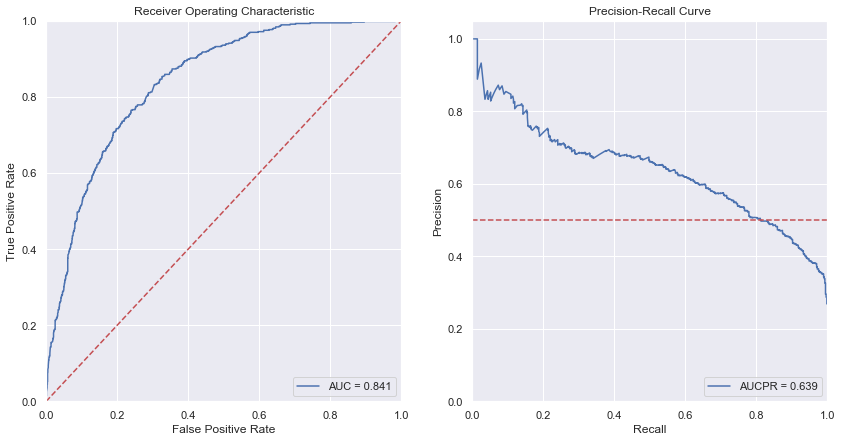

Best iteration: 40 rounds.
AUC:       0.841
AUCPR:     0.639
Logloss:   0.498
Precision: 0.501
Recall:    0.813
F1-score:  0.620


In [54]:
from lightgbm import LGBMClassifier

# Final parameters
params_lgbm = {
    'verbosity':         0,
    'seed':              42,
    'objective':         'binary',
    'scale_pos_weight':  2.76,
    'num_leaves':        4,
    'min_child_weight':  7,
    'min_child_samples': 44,
    'subsample_freq':    10,
    'subsample':         0.6,
    'max_depth':         3,
    'colsample_bytree':  0.2
}

# Instantiate classifier
clf_lgbm = LGBMClassifier(**params_lgbm)

# Fit classifier
clf_lgbm.fit(
    X_train,
    y_train,
    eval_set=[(X_test, y_test)],
    eval_metric=['auc'],    
    early_stopping_rounds=10,
    verbose=False
)

# Output eval metrics
lgbm_evals_dict = OrderedDict()
plot_roc_pr(clf_lgbm)
lgbm_metrics(clf_lgbm, lgbm_evals_dict)

### 6.5 CatBoost Model
Click [here](https://github.com/ayn28/churn-prediction-modeling/blob/master/model-tuning/CatBoost-tuning.ipynb) to view the tuning process.

In [60]:
# Define function to calculate evaluation metrics.
def cat_metrics(clf_name, ordered_dict):
    """Calculate and output evaluation metrics."""
    # Print best iteration
    print('Best iteration: {} rounds.'.format((clf_name.best_iteration_)))
    # Calculate AUCPR
    probs = clf_name.predict_proba(X_test)[:, 1]
    auc_mtr = clf_name.best_score_['validation']['AUC']
    aucpr_mtr = average_precision_score(y_test, probs)
    logloss_mtr = clf_name.best_score_['validation']['Logloss']
    precision_mtr = clf_name.best_score_['validation']['Precision']
    recall_mtr = clf_name.best_score_['validation']['Recall']
    f1_mtr = clf_name.best_score_['validation']['F1']
    # Print metrics
    print('AUC:       {0:.3f}'.format(auc_mtr))
    print('AUCPR:     {0:.3f}'.format(aucpr_mtr))
    print('Logloss:   {0:.3f}'.format(logloss_mtr))
    print('Precision: {0:.3f}'.format(precision_mtr))
    print('Recall:    {0:.3f}'.format(recall_mtr))
    print('F1-score:  {0:.3f}'.format(f1_mtr))
    # Append metrics to an ordered dictionary (for plotting)
    ordered_dict['AUC'] = round(auc_mtr, 3)
    ordered_dict['AUCPR'] = round(aucpr_mtr, 3)
    ordered_dict['Logloss'] = round(logloss_mtr, 3)
    ordered_dict['Precision'] = round(precision_mtr, 3)
    ordered_dict['Recall'] = round(recall_mtr, 3)
    ordered_dict['F1_score'] = round(f1_mtr, 3)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

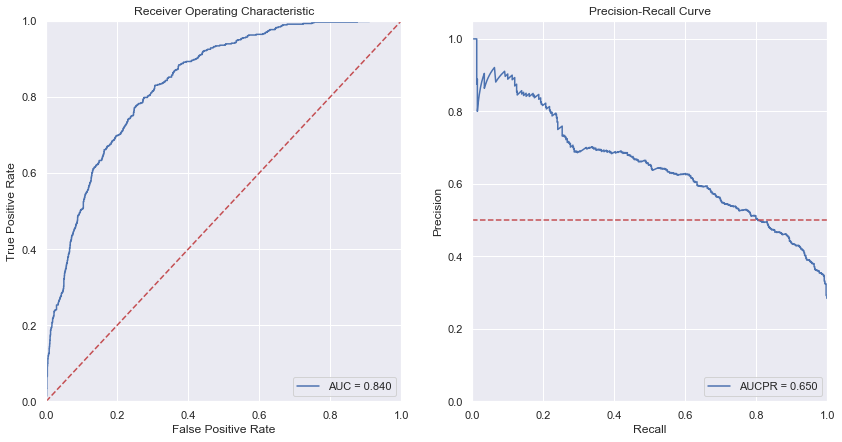

Best iteration: 263 rounds.
AUC:       0.840
AUCPR:     0.650
Logloss:   0.490
Precision: 0.734
Recall:    0.845
F1-score:  0.773


In [64]:
from catboost import CatBoostClassifier

# Final parameters
params_cat = {
    'random_state':     42,
    'loss_function':    'Logloss',     
    'custom_metric':    ['Precision', 'Recall', 'F1', 'AUC'], 
    'eval_metric':      'AUC',
    'scale_pos_weight': 2.76,
    'iterations':       3000,        
    'use_best_model':   True,
    'od_type':          'Iter',
    'od_wait':          20,
    'verbose':          0,
    'max_depth':        3,
    'reg_lambda':       6,
    'learning_rate':    0.03
}

# Instantiate classifier
clf_cat = CatBoostClassifier(**params_cat)

# Fit classifier
clf_cat.fit(
    X_train,
    y_train,
    eval_set=[(X_test, y_test)],
    early_stopping_rounds=100,   
    use_best_model=True,
    verbose=0,
    plot=True                      
);

# Output evaluation metrics 
cat_evals_dict = OrderedDict()
plot_roc_pr(clf_cat)
cat_metrics(clf_cat, cat_evals_dict)

### 6.6 SVM Model
Click [here](https://github.com/ayn28/churn-prediction-modeling/blob/master/model-tuning/SVM-tuning.ipynb) to view the tuning process.

In [74]:
from sklearn.metrics import roc_auc_score, log_loss

# Define function to calculate evaluation metrics.
def metrics(clf_name, ordered_dict):
    """Calculate and output evaluation metrics."""
    pred_probs = clf_name.predict_proba(X_test)[:, 1]
    ypred = clf_name.predict(X_test)
    # The positive label for the numerically encoded samples == 1
    # The positive label for the samples NOT encoded == 'Yes'
    auc_mtr = roc_auc_score(y_test, pred_probs)
    aucpr_mtr = average_precision_score(y_test, pred_probs, pos_label='Yes')
    logloss_mtr = log_loss(y_test, pred_probs)
    precision_mtr = precision_score(y_test, ypred, pos_label='Yes')
    recall_mtr = recall_score(y_test, ypred, pos_label='Yes')
    f1_mtr = f1_score(y_test, ypred, pos_label='Yes')
    print('AUC:       {0:.3f}'.format(auc_mtr))
    print('AUCPR:     {0:.3f}'.format(aucpr_mtr))
    print('Logloss:   {0:.3f}'.format(logloss_mtr))
    print('Precision: {0:.3f}'.format(precision_mtr))
    print('Recall:    {0:.3f}'.format(recall_mtr))
    print('F1-score:  {0:.3f}'.format(f1_mtr))
    # Append metrics to an ordered dictionary (for plotting)
    ordered_dict['AUC'] = round(auc_mtr, 3)
    ordered_dict['AUCPR'] = round(aucpr_mtr, 3)
    ordered_dict['Logloss'] = round(logloss_mtr, 3)
    ordered_dict['Precision'] = round(precision_mtr, 3)
    ordered_dict['Recall'] = round(recall_mtr, 3)
    ordered_dict['F1_score'] = round(f1_mtr, 3)
    
# Define function to plot ROC and PR curve.
def plot_roc_pr(clf_name):
    """Plot the ROC and PR-curve for a given classifier."""
    plt.figure(figsize=(14, 7))
    # Plot ROC
    plt.subplot(121)
    probs = clf_name.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, probs, pos_label='Yes')
    roc_auc = auc(fpr, tpr)
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label='AUC = %0.3f' % roc_auc)
    plt.legend(loc='lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    # Plot PR curve
    plt.subplot(122)
    precision, recall, thresholds = precision_recall_curve(y_test, probs, pos_label='Yes')
    average_precision = average_precision_score(y_test, probs, pos_label='Yes')
    plt.title('Precision-Recall Curve')
    plt.plot(recall, precision, 'b', label='AUCPR = %0.3f' % average_precision)
    plt.legend(loc='lower right')
    plt.plot([0, 1], [0.5, 0.5],'r--')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.show()

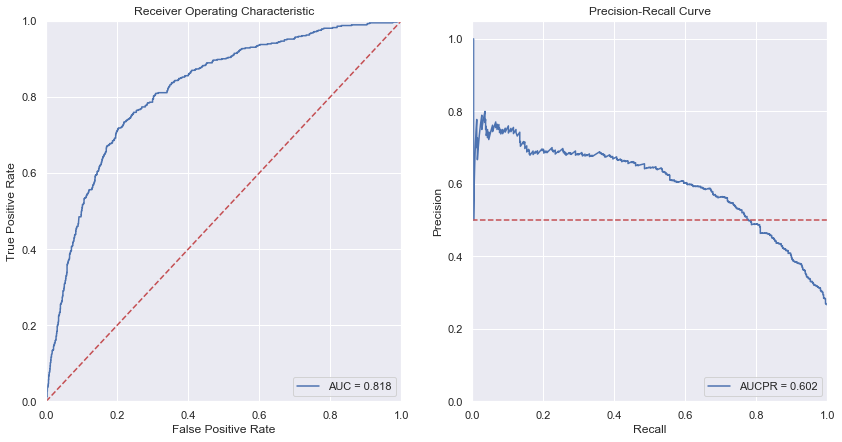

AUC:       0.818
AUCPR:     0.602
Logloss:   0.453
Precision: 0.644
Recall:    0.494
F1-score:  0.559


In [80]:
from sklearn.preprocessing import Normalizer, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC

# Final parameters
params_svm = {
    'gamma':      'scale', 
    'probability': True,
    'kernel':     'rbf',
    'C':           1
}

# Create preprocessing pipeline for numerical data
numeric_features = df.select_dtypes(exclude='object').columns.drop(['TotalCharges']).tolist()
numeric_transformer = Pipeline(steps=[
    ('normalize', Normalizer())
    
])

# Create preprocessing pipeline for categorical data
categorical_features = df.select_dtypes(include='object').columns.drop(['Churn', 'gender']).tolist()
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Create preprocessing pipeline in a ColumnTransformer
preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, numeric_features),
    ('cat', categorical_transformer, categorical_features)
])

# Append classifier to preprocessing pipeline
pipe_svm = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('clf', SVC(**params_svm))
])

# Define target and features and exclude TotalCharges from modeling
X = df.drop(['Churn', 'gender', 'TotalCharges'], axis=1)
y = df['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Fit pipeline
pipe_svm.fit(X_train, y_train)

# Output evaluation metrics
svm_evals_dict = OrderedDict()
plot_roc_pr(pipe_svm)
metrics(pipe_svm, svm_evals_dict)

## 7. Model Comparisons
### 7.1 Results

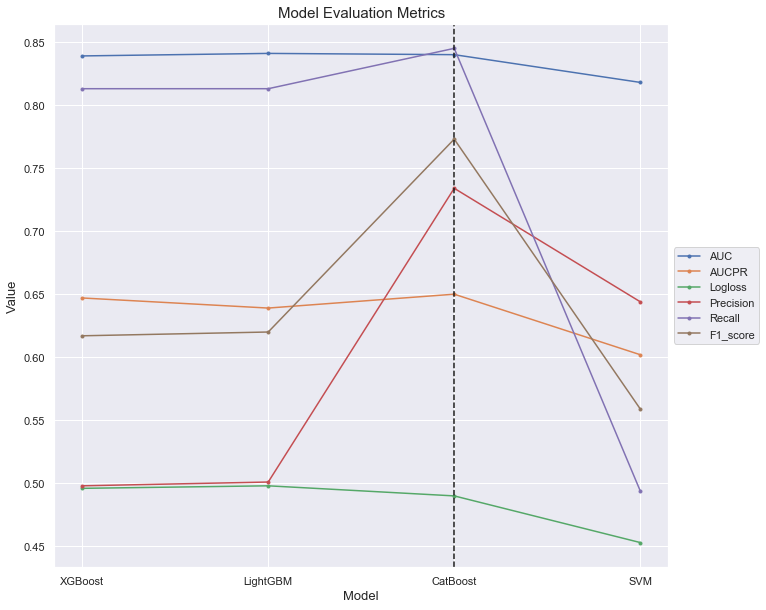

,AUC,AUCPR,Logloss,Precision,Recall,F1_score
XGBoost,0.839,0.647,0.496,0.498,0.813,0.617
LightGBM,0.841,0.639,0.498,0.501,0.813,0.620
CatBoost,0.840,0.650,0.490,0.734,0.845,0.773
SVM,0.818,0.602,0.453,0.644,0.494,0.559


In [132]:
df_final = pd.DataFrame(
    data=[
        [val for (metric, val) in xgb_evals_dict.items()],
        [val for (metric, val) in lgbm_evals_dict.items()],
        [val for (metric, val) in cat_evals_dict.items()],
        [val for (metric, val) in svm_evals_dict.items()],
    ],
    columns=[metric for (metric, val) in xgb_evals_dict.items()]
).rename(
    index={
        0: 'XGBoost',
        1: 'LightGBM',
        2: 'CatBoost',
        3: 'SVM'
    })

plt.figure(figsize=(11, 10));
N = len(df_final.index)
ind = np.arange(N)

# Plot metrics
for model in list(df_final.columns):
    plt.plot(ind, df_final[model].values, linewidth=1.5, marker='.', label=model);

plt.axvline(x=2, color='k', linestyle='--')

plt.xticks(
    ticks=np.arange(N),
    labels=[
        'XGBoost',
        'LightGBM',
        'CatBoost',
        'SVM'
    ]
)
plt.title('Model Evaluation Metrics', fontsize=15)
plt.ylabel('Value', fontsize=13)
plt.xlabel('Model', fontsize=13)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5));
plt.show()

df_final